In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
c_base = pd.read_csv("cardio_base.csv")
c_alco = pd.read_csv("cardio_alco.csv",sep=";")
covid_t = pd.read_csv("covid_data.csv")


In [3]:
c_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [4]:
c_base['age'] = (c_base['age']/365).astype(int)

In [5]:
c_base.shape

(70000, 9)

In [6]:
c_base.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
dtype: object

In [7]:
c_alco.head(5)

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [8]:
c_alco.dtypes

id      int64
alco    int64
dtype: object

In [9]:
c_alco.shape

(56903, 2)

In [10]:
c_alco = pd.merge(c_alco,c_base, on = 'id', how = 'left')

In [11]:
c_alco.head()

,id,alco,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,44,0,40,1,159,60.0,110,70,1,0
1,45,0,56,1,160,73.0,130,85,1,0
2,46,0,60,2,173,82.0,140,90,3,0
3,47,0,55,1,163,55.0,120,80,1,0
4,49,0,50,2,175,95.0,120,80,1,0


In [12]:
c_alco.shape

(56903, 10)

In [13]:
covid_t.dtypes

location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object

#### 1. How much heavier the age group with the highest average weight than the age group with the lowest weight?

In [14]:
agg1 = c_base.groupby('age').agg(['mean', 'count','sum'])['weight'].sort_values('mean')\
.reset_index()

In [15]:
diff = agg1['mean'][len(agg1) - 1] - agg1['mean'][0]
round((diff/agg1['mean'][0]) * 100, 4)

np.float64(28.5995)

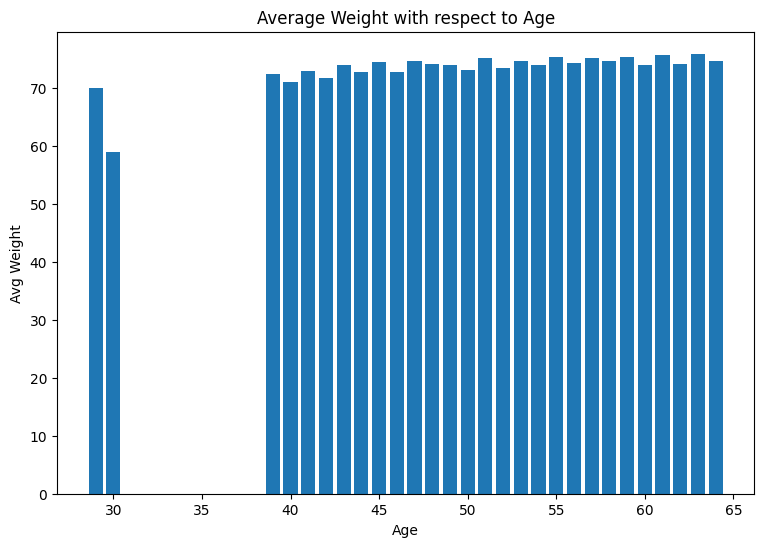

In [16]:
plt.figure(figsize = (9,6))

plt.bar(agg1['age'], height = agg1['mean'])
plt.xlabel('Age')
plt.ylabel('Avg Weight')
plt.title('Average Weight with respect to Age')
plt.show()

#### 2. Do people over 50 have higher cholesterol levels than the rest?

In [17]:
c_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0


In [18]:
less_than_50 = c_base.loc[c_base['age'] <= 50, 'cholesterol'].mean()
greater_than_50 = c_base.loc[c_base['age'] > 50, 'cholesterol'].mean()

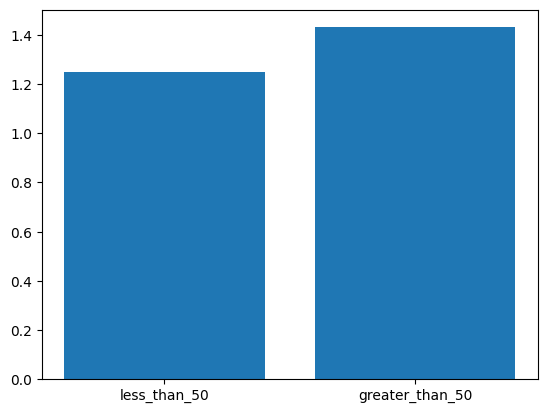

In [19]:
plt.bar(['less_than_50', 'greater_than_50'], [less_than_50, greater_than_50])
plt.show()

#### 3. Are men more likely to be a smoker than women?

In [20]:
c_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0


In [21]:
 men_smoke = c_base.loc[c_base['gender'] == 1, 'smoke'].count()
 women_smoke = c_base.loc[c_base['gender'] == 2, 'smoke'].count()

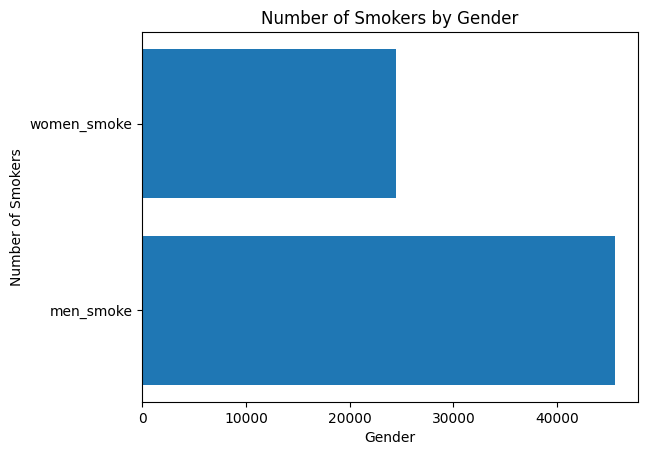

In [22]:
plt.barh(['men_smoke', 'women_smoke'], [men_smoke, women_smoke])
plt.xlabel("Gender")
plt.ylabel("Number of Smokers")
plt.title("Number of Smokers by Gender")
plt.show()


#### 4. How tall are the tallest 1% of people?

In [23]:
c_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0


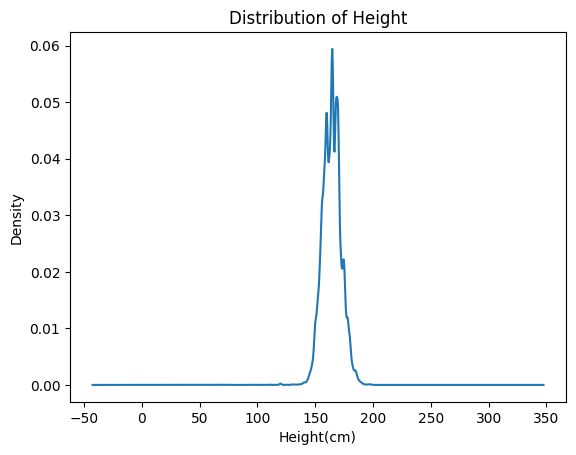

In [24]:
ax = c_base["height"].plot(kind="kde",title="Distribution of Height")
plt.xlabel("Height(cm)")
plt.show()


In [25]:
##Quantile approach
c_base['height'].quantile(0.99)

np.float64(184.0)

#### 5. Which two features have the highest spearman rank correlation?

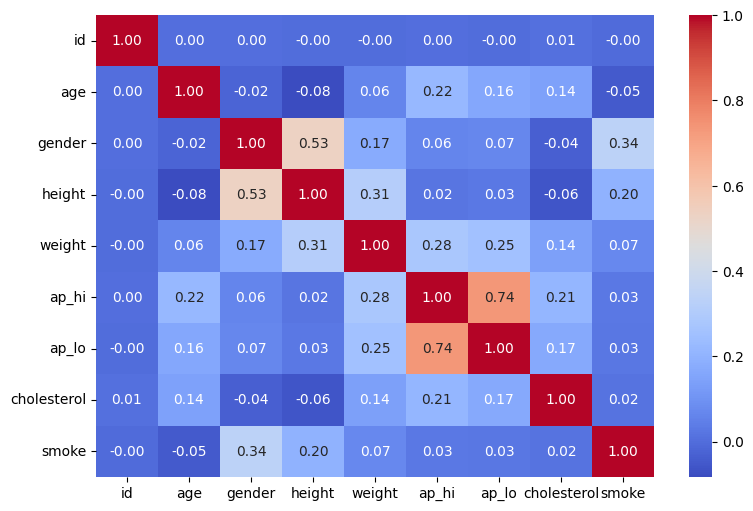

In [26]:
plt.figure(figsize = (9,6))
sns.heatmap(c_base.corr(method = 'spearman'), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [27]:
corr = c_base.corr(method='spearman')

corr_unstacked = corr.unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked < 1]  # remove self-correlation
corr_unstacked.head(1)


ap_lo  ap_hi    0.735436
dtype: float64

#### 6. What percentage of people are more than 2 standard deviations far from the average height?

In [28]:
mean_height = c_base['height'].mean()
std_height = c_base['height'].std()

In [29]:
people_grt_2std = len(c_base[abs(c_base['height'] - mean_height) > 2 *std_height])
total_people = len(c_base)
(people_grt_2std/total_people) * 100

3.3357142857142854

#### 7. What percentage of the population over 50 years old consume alcohol? Ignore those persons, where we have no alcohol sonsumption information!

In [30]:
alcohol_per = len(c_alco.loc[(c_alco['age'] > 50) & c_alco['alco'] == 1 ])
total_alcohol_people = len(c_alco.loc[(c_alco['age'] > 50)])
round((alcohol_per/total_alcohol_people) * 100, 2)

4.91

#### 8. Which of the following statements is true with 95% confidence?¶
⚪Smokers have higher blood presure than non-smokers
⚪Smokers have higher cholesterol level than non-smokers
⚪Smokers weight less than non smokers
⚪Men have higher blood pressure than women

In [31]:
c_alco["avg_bp"] = (c_alco["ap_hi"]+c_alco["ap_lo"]) / 2
grped = c_alco.groupby("smoke").agg(["mean","sem"])["avg_bp"]
grped["hi_bound"] = grped["mean"] + 1.96 * grped["sem"]
grped["low_bound"] = grped["mean"] - 1.96 * grped["sem"]
grped

,mean,sem,hi_bound,low_bound
smoke,,,,
0,112.851959,0.562122,113.953718,111.750200
1,113.139016,1.241633,115.572617,110.705415


In [32]:
grped = c_alco.groupby("smoke").agg(["mean","sem"])["cholesterol"]
grped["hi_bound"] = grped["mean"] + 1.96 * grped["sem"]
grped["low_bound"] = grped["mean"] - 1.96 * grped["sem"]
grped

,mean,sem,hi_bound,low_bound
smoke,,,,
0,1.365668,0.002989,1.371526,1.359810
1,1.390554,0.009616,1.409401,1.371706


In [33]:
grped = c_alco.groupby("smoke").agg(["mean","sem"])["weight"]
grped["hi_bound"] = grped["mean"] + 1.96 * grped["sem"]
grped["low_bound"] = grped["mean"] - 1.96 * grped["sem"]
grped

,mean,sem,hi_bound,low_bound
smoke,,,,
0,73.853289,0.062684,73.976150,73.730429
1,77.356142,0.212276,77.772203,76.940081


In [34]:
grped = c_alco.groupby("gender").agg(["mean","sem"])["avg_bp"]
grped["hi_bound"] = grped["mean"] + 1.96 * grped["sem"]
grped["low_bound"] = grped["mean"] - 1.96 * grped["sem"]
grped


,mean,sem,hi_bound,low_bound
gender,,,,
1,111.749641,0.636337,112.996862,110.502421
2,114.965621,0.918838,116.766543,113.164699


Usually 95% confidence works between two variables works in the way that, 95% is be True that the high bound(hi_bound) and the low bound(low_bound) ranges should not be overlap between the target(i.e here gender,smoke)

#### 9. When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?

In [35]:
german = covid_t.loc[covid_t["location"] == "Germany"]
german["cumsum-ger"] = german["new_cases"].cumsum()
italy = covid_t.loc[covid_t["location"] == "Italy"]
italy["cumsum-ita"] = italy["new_cases"].cumsum()

C:\Users\USER\AppData\Local\Temp\ipykernel_11820\947722498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  german["cumsum-ger"] = german["new_cases"].cumsum()
C:\Users\USER\AppData\Local\Temp\ipykernel_11820\947722498.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy["cumsum-ita"] = italy["new_cases"].cumsum()


In [36]:
joined = pd.merge(german,italy,on="date")

In [37]:
joined[abs(joined["cumsum-ger"]-joined["cumsum-ita"])>10000]["date"].min()

'2020-03-12'

#### 10. Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

In [38]:
between_dates = italy.query('date <= "2020-03-20" and date> "2020-02-29"')

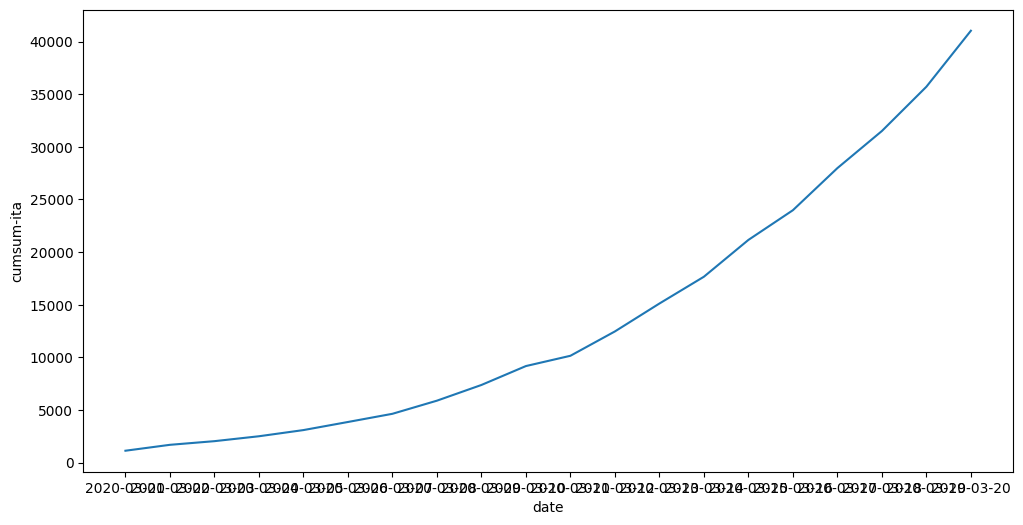

In [39]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(between_dates,x="date",y="cumsum-ita")
plt.show()

#### 11. Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.

In [40]:
country_rate = covid_t.groupby("location").agg({"new_deaths":"sum","aged_65_older_percent":"mean","population":"mean"})
country_rate["death_rate"] = country_rate["new_deaths"] / country_rate["population"] * 10_00_000

In [41]:
country_rate.sort_values(by="death_rate",ascending=False).dropna()

,new_deaths,aged_65_older_percent,population,death_rate
location,,,,
Belgium,9619,18.571,11589616.0,829.967102
United Kingdom,40883,18.517,67886004.0,602.230174
Spain,27136,19.436,46754783.0,580.389818
Italy,34043,23.021,60461828.0,563.049467
Sweden,4717,19.985,10099270.0,467.063461
...,...,...,...,...
Saint Lucia,0,9.721,183629.0,0.000000
Saint Vincent and the Grenadines,0,7.724,110947.0,0.000000
Timor,0,3.556,1318442.0,0.000000


#### 12. What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!

In [42]:
aged_greater_20 = country_rate.query(' aged_65_older_percent > 20')
aged_greater_20_50Million = aged_greater_20.query(' death_rate > 50')

In [43]:
from sklearn.metrics import f1_score

y_true = [1] * len(aged_greater_20)
y_pred = [1] * len(aged_greater_20_50Million) + [0] * (len(aged_greater_20)-len(aged_greater_20_50Million))

In [44]:
f1_score(y_true,y_pred)

0.7272727272727273